In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [63]:
img = cv2.imread('image_05722.jpg',-1)

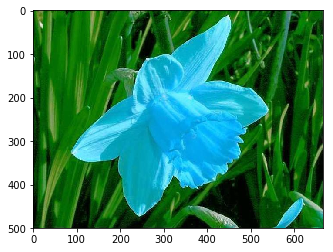

In [64]:
#img = cv2.resize(img,(256,256))
plt.imshow(img)

In [ ]:
#BGR to HSI
normalized_img = np.zeros(img.shape).astype(float)
normalized_img = cv2.normalize(img.astype(float),normalized_img,0,1,cv2.NORM_MINMAX)
img_converted = np.zeros_like(img,dtype='float')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        H = 0
        S = 0
        I = 0
        R = float(normalized_img[i][j][2])
        G = float(normalized_img[i][j][1])
        B = float(normalized_img[i][j][0])
        RGB_sum = R + G + B
        RGB_min = min(R, G, B)
        #print("{} ,{} ,{} , {} , {}".format(R,G,B,RGB_min,RGB_sum))
        I = (1/3) * RGB_sum
        if R == G and G == B:
            H = 0
            S = 0
        else:
            S = 1 - ((3*RGB_min)/RGB_sum)
            if S > 0.9999:
                S = 1
            if S < 0.00001:
                S = 0
                H = 0
            else:
                dividend = (1/2) * ((R-G) + (R-B))
                divisor = math.sqrt(math.pow((R-G),2) + (R-B)*(G-B))
                w = dividend/divisor
                if w > 1:
                    w=1
                elif w < -1:
                    w = -1                    
                H = math.acos(w)
                if B > G:
                    H = (2*math.pi) - H
        img_converted[i][j][0] = H * (180 / math.pi)
        img_converted[i][j][1] = S
        img_converted[i][j][2] = I

plt.imshow(img_converted)
print("RGB {},{},{}  , HSI {},{},{}".format(img[0][0][2],img[0][0][1],img[0][0][0],img_converted[0][0][0]
                                           ,img_converted[0][0][1],img_converted[0][0][2]))
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(img_converted[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(img_converted[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(img_converted[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(img_converted[-20:-1,0:])

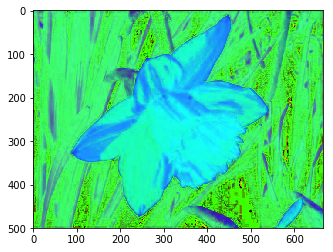

In [65]:
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(HSV_img)

(array([  565.,    96.,   310.,   952.,  2633.,  1232.,  1372.,  1609.,
         1274.,  1113.,   998.,   921.,   834.,   879.,   828.,   774.,
          751.,   726.,   703.,   749.,  1709., 10260., 13429., 12298.,
        15291., 17199., 16319.,  8953.,  4214.,  2343.,  1698.,  1298.,
         1324.,  1170.,  1247.,  1317.,  1362.,  1246.,  1328.,  1413.,
         1485.,  1327.,  1618.,  1564.,  1462.,  1564.,  1547.,  1516.,
         1861.,  1747.,  2296.,  2134.,  2157.,  2436.,  2795.,  4676.,
         5093.,  7362., 14648., 26738., 53012., 31645., 21695., 17201.,
        11708.,  8283.,  8192.,  5465.,  4868.,  4323.,  4072.,  3643.,
         3472.,  3616.,  3298.,  3548.,  2691.,  2482.,  2626.,  2342.,
         2476.,  2199.,  2260.,  2466.,  2084.,  2270.,  1997.,  2101.,
         2090.,  2104.,  2123.,  2176.,  2117.,  2135.,  2191.,  2199.,
         2322.,  2286.,  2261.,  2326.,  2428.,  2516.,  2714.,  2856.,
         3086.,  3037.,  3091.,  3020.,  3164.,  3198.,  3394., 

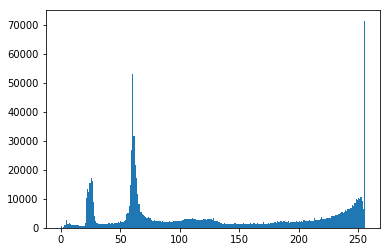

In [66]:
plt.hist(HSV_img.ravel(),256,[0,256])

In [99]:
def Remove_Freq_Values(original_image,filter_size,ratio):
    new_image = np.zeros_like(original_image)
    most_freq = []
    #cv2.calcHist(images, channels, mask, bins, ranges)
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask[0:,-filter_size:-1] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    mask = np.zeros(original_image.shape[:2],np.uint8)
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[0:filter_size,0:] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    mask = np.zeros(original_image.shape[:2],np.uint8)
    mask[-filter_size:-1,0:] = 1
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    for i in range(hist.shape[0]):
        if hist[i][0] >= hist[hist.argmax()][0]/ratio:
            most_freq.append(i)
    
    #most_freq_ratio = hist[hist.argmax()] / hist.sum()
    print(most_freq)
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            #if hist[original_image[i][j][0]]/hist.sum() < (most_freq_ratio/ratio) and original_hist[original_image[i][j][0]]/original_hist.sum() < 0.05:
            if original_image[i][j][0] not in most_freq:
                new_image[i][j][0] = original_image[i][j][0]
                new_image[i][j][1] = original_image[i][j][1]
                new_image[i][j][2] = original_image[i][j][2]
    if cv2.compare(new_image,original_image,0).all():
        print("Nothing Changed")
    #original_hist = cv2.calcHist([original_image],[0],None,[256],[0,256])
    return new_image

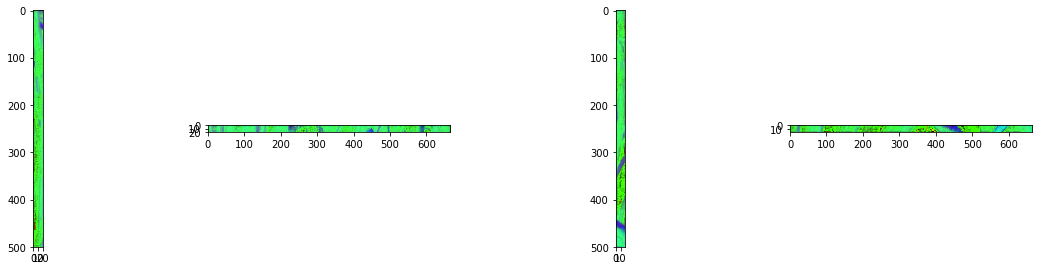

In [96]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(HSV_img[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(HSV_img[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(HSV_img[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(HSV_img[-20:-1,0:])

[59, 60, 61, 62, 63, 58, 59, 60, 61, 62, 63, 58, 59, 60, 61, 62, 63, 64, 59, 60, 61]
[0, 0, 0, 0]
[0, 0, 0, 0]
Nothing Changed
[0, 0, 0, 0]
Nothing Changed


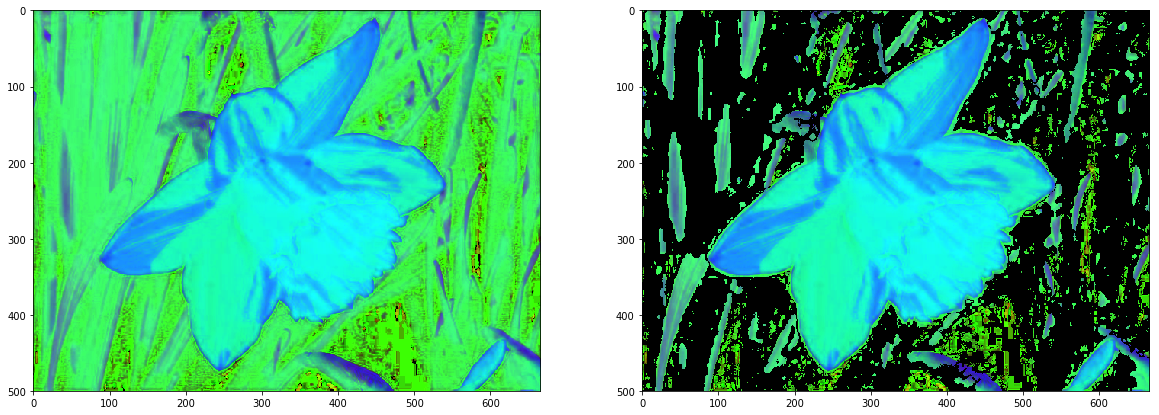

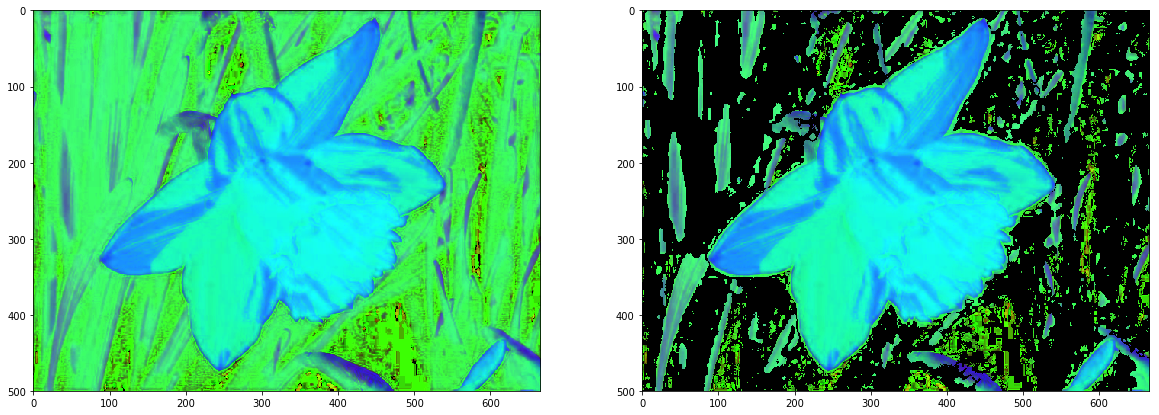

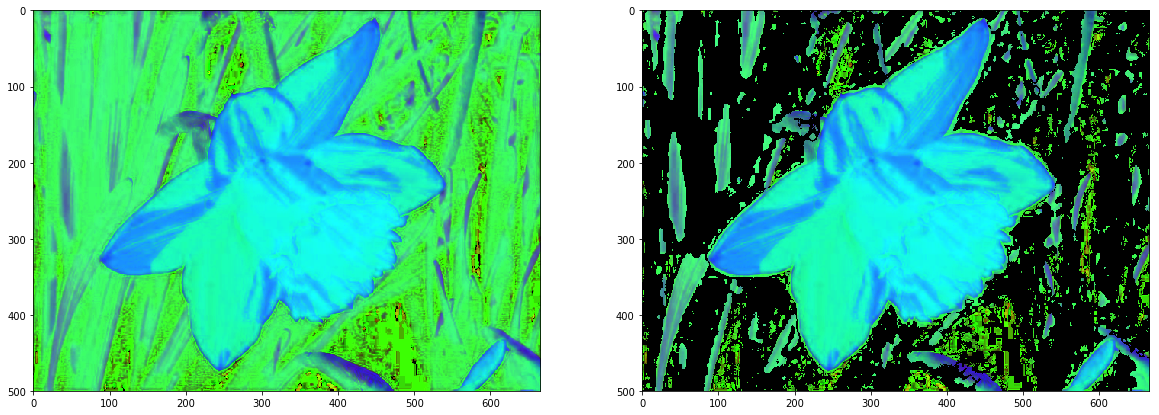

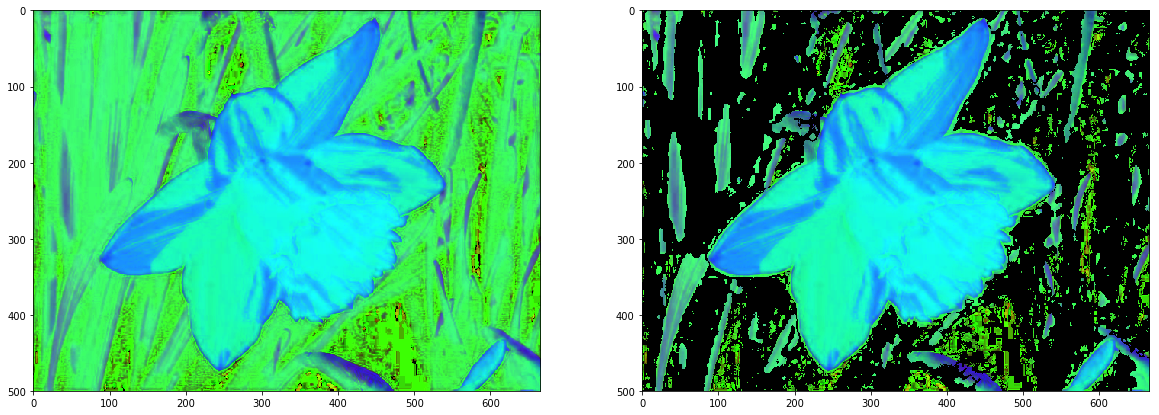

In [108]:
filterd_HSV_filter = np.zeros_like(HSV_img)
filterd_HSV_filter = cv2.normalize(HSV_img,filterd_HSV_filter,0,255,cv2.NORM_MINMAX)
filter_size = 35
for i in range(4):
    ratio = 4
    mask = np.zeros(HSV_img.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    mask[0:,-filter_size:-1] = 1
    mask[0:filter_size,0:] = 1
    mask[-filter_size:-1,0:] = 1
    filterd_HSV_filter = Remove_Freq_Values(filterd_HSV_filter,filter_size,ratio)
    #plt.imshow(filterd_HSV_filter_1)
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,1)
    plt.imshow(HSV_img)
    ax = fig.add_subplot(2,2,2)
    plt.imshow(filterd_HSV_filter)
    filter_size += 5
    ratio += 4

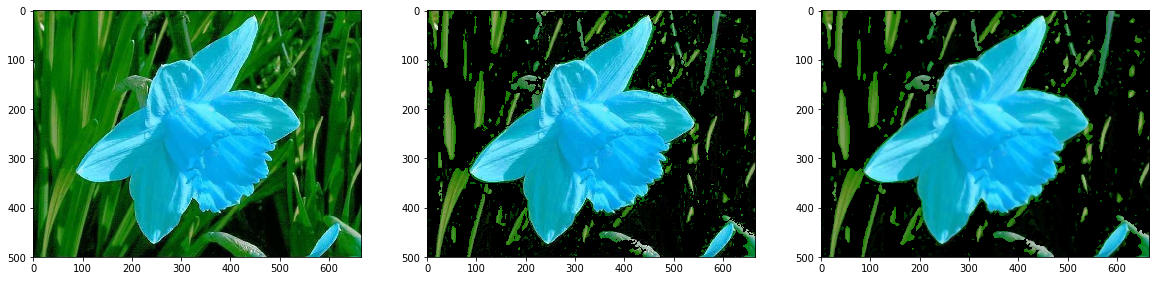

In [112]:
new_img = cv2.cvtColor(filterd_HSV_filter,cv2.COLOR_HSV2BGR)
new_img2 = cv2.medianBlur(new_img,5)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax = fig.add_subplot(1,3,2)
plt.imshow(new_img)
ax = fig.add_subplot(1,3,3)
plt.imshow(new_img2)